# Class Pratical Assigment
#### 28.03.2022

Predicting Housing Prices for regions in the USA. The data contains the following columns:
 - 'Avg. Area Income': Avg. Income of residents of the city house is located in;
 - 'Avg. Area House Age': Avg Age of Houses in same city;
 - 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city;
 - 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city;
 - 'Area Population': Population of city house is located in;
 - 'Price': Price that the house sold at;
 - 'Address': Address for the house.

### ML Algorithms used:
 - Linear regression;
 - Decision Trees;
 - Decision Trees - Bagging;
 - Random Forest;
 - XGBoost;


### References: 
 - https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm#%F0%9F%93%8A-Models-Comparison
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/4%20-%20Ensemble%20Methods.ipynb
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/3%20-%20Decision%20Trees.ipynb
 - https://github.com/TheAIFramework/PracticalMachineLearning/tree/gradient

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [247]:
df = pd.read_csv('Housing_Data.csv')

In [248]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [249]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Data Analysis and Cleaning

In [251]:
# Encontra valores nulos no dataset
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [252]:
# Tamanho do dataset
print('Nº linhas:', df.shape[0])
print('Nº colunas:', df.shape[1])

Nº linhas: 5000
Nº colunas: 7


'Address' column doesnt significantly add something to the dataset, thus is fully dropped

In [253]:
df = df.drop(['Address'], axis=1)

In [254]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [255]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [256]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [258]:
def box_plotting(column_name):
    print("\n - ", column_name)
    # Gera gráfico caixa de bigodes
    fig = plt.figure()
    sns.boxplot(df[column_name])

    # Calcular os quartis e o indice quartil
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    median = df[column_name].median()
    print("Quartil 1: ", q1)
    print("Mediana: ", median)
    print("Quartil 3: ", q3)
    print("Interquantil Range (IQR): ", IQR)

    # Cacular os limites min/max para calcular outliers
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    print("Limite Superior:", upper)
    print("Limite Inferior:", lower)
        
    clean_data = df[~((df[column_name] < lower) |(df[column_name] > upper))]
    print("Qtd de outliers:", df.shape[0] - clean_data.shape[0])
    
    return {'lower': lower, 'upper': upper}


 -  Avg. Area Income
Quartil 1:  61480.562388460974
Mediana:  68804.28640371616
Quartil 3:  75783.33866615265
Interquantil Range (IQR):  14302.776277691672
Limite Superior: 97237.50308269015
Limite Inferior: 40026.39797192346
Qtd de outliers: 32

 -  Avg. Area House Age
Quartil 1:  5.322283015802158
Mediana:  5.970428947124802
Quartil 3:  6.6508084794160585
Interquantil Range (IQR):  1.3285254636139001
Limite Superior: 8.643596674836909
Limite Inferior: 3.329494820381308
Qtd de outliers: 25

 -  Avg. Area Number of Rooms
Quartil 1:  6.299250099611249
Mediana:  7.002901987201934
Quartil 3:  7.66587144759798
Interquantil Range (IQR):  1.3666213479867313
Limite Superior: 9.715803469578077
Limite Inferior: 4.249318077631152
Qtd de outliers: 24

 -  Avg. Area Number of Bedrooms
Quartil 1:  3.14
Mediana:  4.05
Quartil 3:  4.49
Interquantil Range (IQR):  1.35
Limite Superior: 6.515000000000001
Limite Inferior: 1.1149999999999998
Qtd de outliers: 0

 -  Area Population
Quartil 1:  29403.92870

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manu

Quartil 1:  997577.1350487601
Mediana:  1232669.3779657914
Quartil 3:  1471210.2042115545
Interquantil Range (IQR):  473633.0691627944
Limite Superior: 2181659.807955746
Limite Inferior: 287127.5313045685
Qtd de outliers: 35


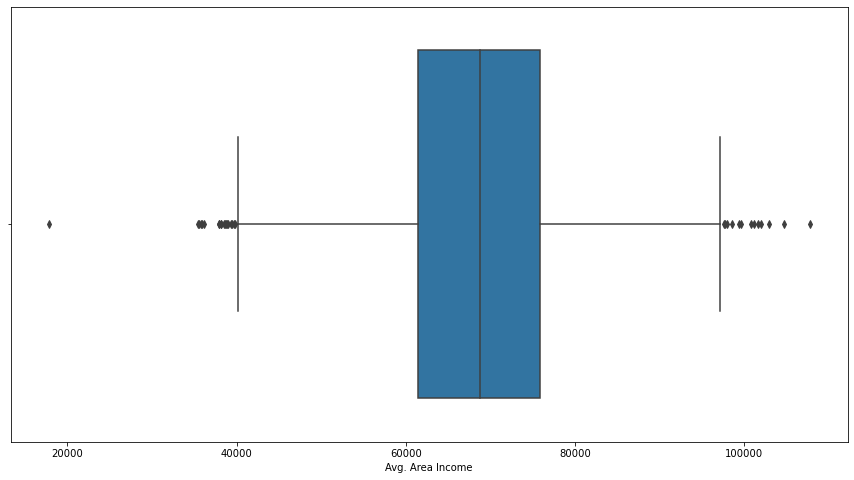

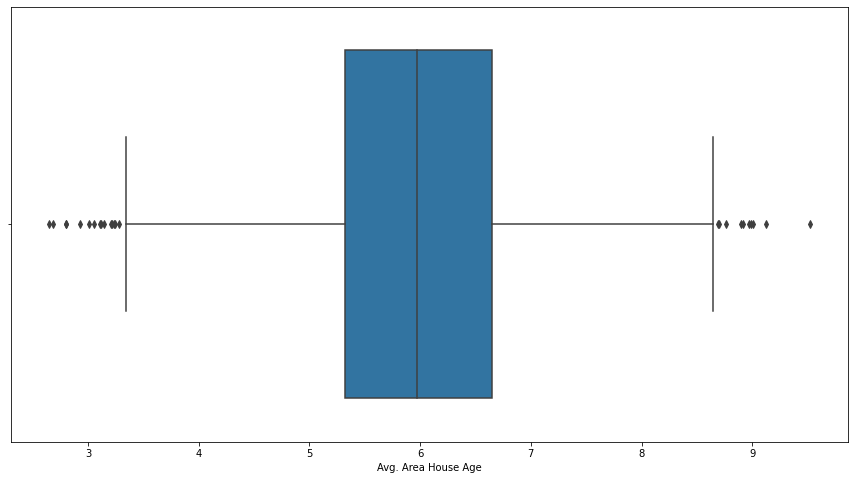

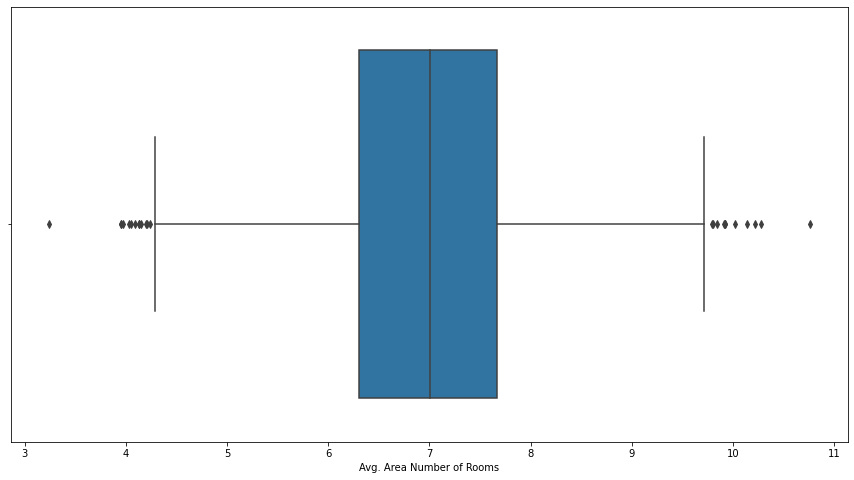

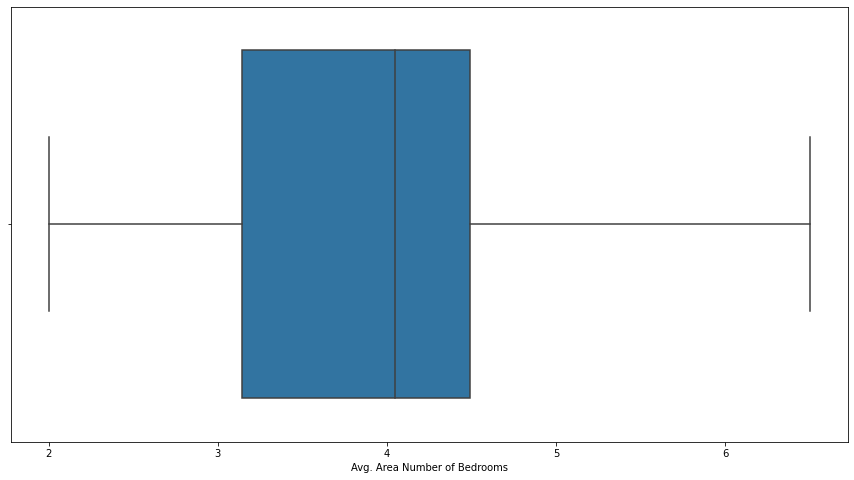

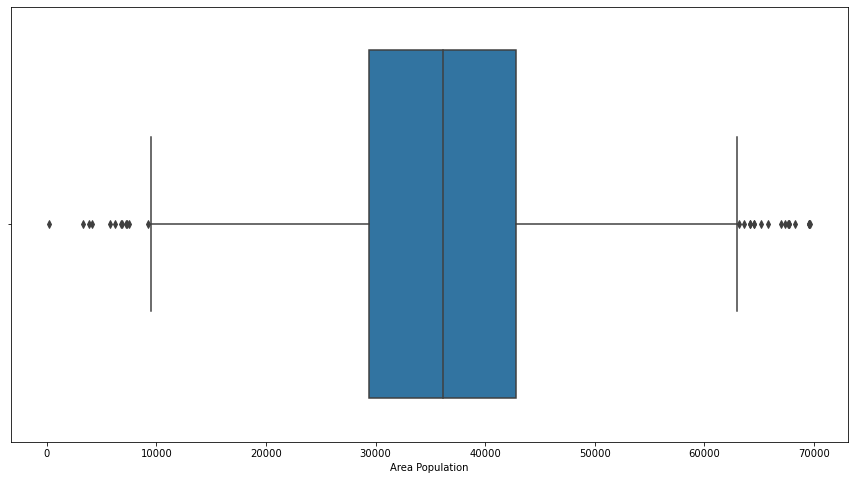

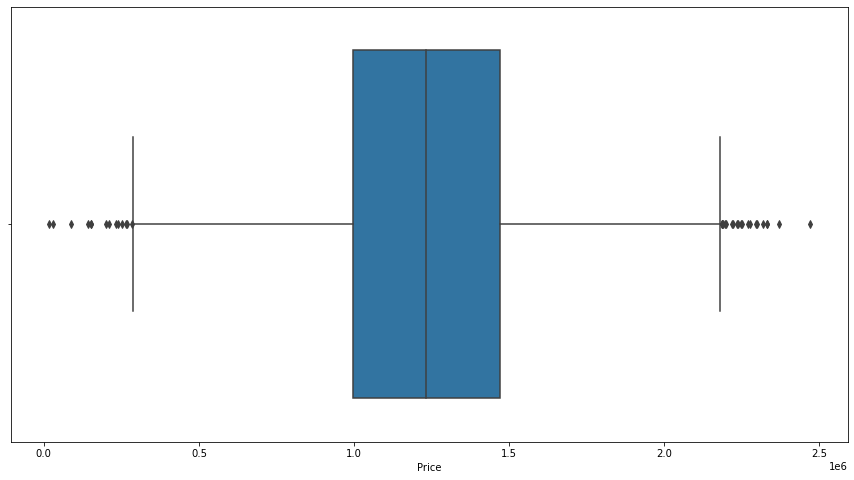

In [259]:
# Check for outliers in dataset
columns = df.columns
for col in columns:
    box_plotting(col)
#     df = df[~((df[col] < o['lower']) |(df[col] > o['upper']))]

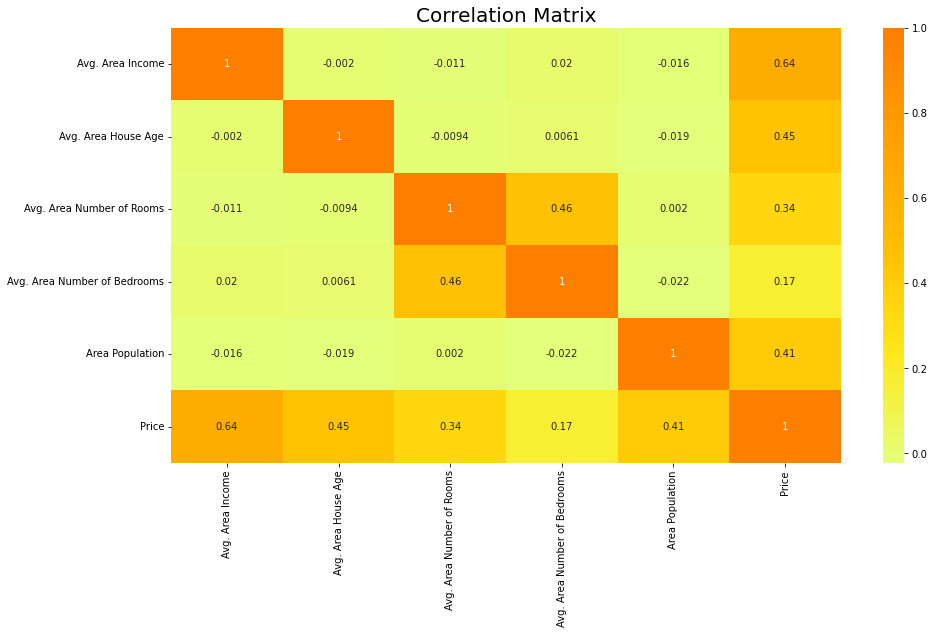

In [260]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

Seems to exist considerable correlation between all features and our target

In [261]:
df.shape

(5000, 6)

## Training

In [262]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [263]:
# Target
y = df['Price']

In [264]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [265]:
# Features
X = df
# drop one column by name
X.drop('Price', axis=1, inplace=True)

In [266]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [267]:
# 80/20 training and testing splitting - Pareto principle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [270]:
lr_pred

array([1447618.1790286 ,  482183.44807272, 1374777.17353984,
       1476426.41676464,  920970.99916233,  918864.26936575,
        700779.77960715,  917283.35901391, 1694587.85039867,
       1270447.60551288,  798576.49830286, 1902557.88694732,
       1297096.80813305,  917100.88467989,  950154.14973026,
       1345539.08356644, 1286389.34278381, 1611499.9956854 ,
       1093310.81064152,  850421.8416947 , 1599702.87861281,
        724014.94161075, 1351000.15608643, 1526974.558145  ,
       1716279.62760116,  987531.51952631, 1722227.16553433,
       1270709.65740644, 1151513.85919549,  964023.77228875,
       1725499.86134537, 1376051.47530825, 1150447.09574   ,
       1457380.78235789, 1696821.51273607,  836308.41814   ,
       2000310.20295318, 1278820.09481172, 1070385.97615472,
        749245.73067866, 1239823.226707  ,  470286.06676407,
       1516121.73889433, 1392942.48295635, 1112578.97486152,
        995951.5339229 , 1285970.13579706,  613894.61405002,
       1284815.00441227,

In [271]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate(tt, pred):
    mae = mean_absolute_error(tt, pred)
    mse = mean_squared_error(tt, pred)
    rmse = mean_squared_error(tt, pred, squared=False)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    return {'mae': mae, 'mse': mse, 'rmse': rmse}

In [272]:
lr_score = evaluate(y_test, lr_pred)

MAE: 82801.24404960555
MSE: 10442649231.54239
RMSE: 102189.28139263134


In [273]:
lr_res = pd.DataFrame({
    'Model': ['Linear Regression'], 
    'Train MAE': None, 
    'Train RMSE': None, 
    'Test MAE': lr_score['mae'], 
    'Test RMSE': lr_score['rmse'] 
})

In [274]:
lr_res

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,None,None,82801.24405,102189.281393


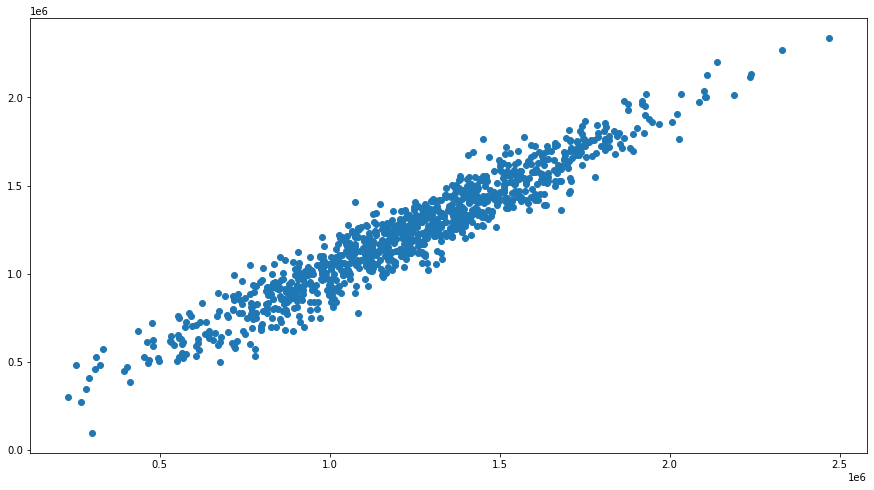

In [275]:
plt.scatter(y_test, lr_pred)

##  Decision Trees

In [276]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [277]:
dtr_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=20) 
dtr_model.fit(X_train, y_train)

dtr_pred_train = dtr_model.predict(X_train)
evaluate(y_train, dtr_pred_train)

MAE: 104827.96456299302
MSE: 17756634866.005337
RMSE: 133254.02382669476


{'mae': 104827.96456299302,
 'mse': 17756634866.005337,
 'rmse': 133254.02382669476}

In [278]:
dtr_pred_test = dtr_model.predict(X_test)
evaluate(y_test, dtr_pred_test)

MAE: 137460.6646343482
MSE: 31180537127.78322
RMSE: 176580.1153238473


{'mae': 137460.6646343482, 'mse': 31180537127.78322, 'rmse': 176580.1153238473}

In [279]:
# lets try some Grid Search

param = {'splitter':('best', 'random'), 
         'max_depth' : [1,2,3,4,5,10], 
         'min_samples_leaf' : [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35]}

dtr_gs = GridSearchCV(DecisionTreeRegressor(), param)

In [280]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30,
                                              35],
                         'splitter': ('best', 'random')})

In [281]:
dtr_gs.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [282]:
dtr_pred_train = dtr_gs.predict(X_train)
dtr_train_score = evaluate(y_train, dtr_pred_train)

MAE: 76241.77863960585
MSE: 9455155937.905796
RMSE: 97237.62614289694


In [283]:
dtr_pred_test = dtr_gs.predict(X_test)
dtr_test_score = evaluate(y_test, dtr_pred_test)

MAE: 129965.18648997633
MSE: 27615852463.79303
RMSE: 166180.18071898053


In [284]:
dtr_res = pd.DataFrame({
    'Model': ['Decision Trees Regressor'], 
    'Train MAE': dtr_train_score['mae'], 
    'Train RMSE': dtr_train_score['rmse'], 
    'Test MAE': dtr_test_score['mae'], 
    'Test RMSE': dtr_test_score['rmse'] 
})

r1 = lr_res.append(dtr_res, ignore_index=True)

In [285]:
r1

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.24405,102189.281393
1,Decision Trees Regressor,76241.77864,97237.626143,129965.18649,166180.180719


##  Bagging - Decision Trees

In [286]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [287]:
bag_dtr_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=3),
    verbose=1,
    n_jobs=-1
)

bag_dtr_model.fit(X_train, y_train)

bag_dtr_pred_train = bag_dtr_model.predict(X_train)
bag_dtr_train_score = evaluate(y_train, bag_dtr_pred_train)

MAE: 63667.48686897206
MSE: 6620513919.973238
RMSE: 81366.5405432309


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [288]:
bag_dtr_pred_test = bag_dtr_model.predict(X_test)
bag_dtr_test_score = evaluate(y_test, bag_dtr_pred_test)

MAE: 103367.79947375116
MSE: 17520496476.260326
RMSE: 132365.01228141948


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [289]:
bag_dtr_res = pd.DataFrame({
    'Model': ['Decision Trees Regressor - Bagging'], 
    'Train MAE': bag_dtr_train_score['mae'], 
    'Train RMSE': bag_dtr_train_score['rmse'], 
    'Test MAE': bag_dtr_test_score['mae'], 
    'Test RMSE': bag_dtr_test_score['rmse'] 
})

r2 = r1.append(bag_dtr_res, ignore_index=True)

In [290]:
r2

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.244050,102189.281393
1,Decision Trees Regressor,76241.778640,97237.626143,129965.186490,166180.180719
2,Decision Trees Regressor - Bagging,63667.486869,81366.540543,103367.799474,132365.012281


## Random Forest

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
rfr_model = RandomForestRegressor(max_depth=10, n_estimators=3, verbose=1, n_jobs=-1)

rfr_model.fit(X_train, y_train)

rfr_pred_train = rfr_model.predict(X_train)
rfr_train_score = evaluate(y_train, rfr_pred_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


MAE: 66987.31431118592
MSE: 7791824519.809994
RMSE: 88271.31198645454


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


In [293]:
rfr_pred_test = rfr_model.predict(X_test)
rfr_test_score = evaluate(y_train, rfr_pred_train)

MAE: 66987.31431118592
MSE: 7791824519.809994
RMSE: 88271.31198645454


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


In [294]:
# lets try some Grid Search

# param = {'max_depth' : [1,2,3,4,5,10], 
#          'min_samples_leaf' : [2, 3, 4, 5, 10, 15, 20]}

# rfr_gs = GridSearchCV(RandomForestRegressor(), param)

In [295]:
# rfr_gs.fit(X_train, y_train)

In [296]:
# rfr_gs.best_estimator_

In [297]:
# rfr_gs_pred_train = rfr_gs.predict(X_train)
# rfr_gs_train_score = evaluate(y_train, rfr_gs_pred_train)

In [298]:
# rfr_gs_pred_test = rfr_gs.predict(X_test)
# rfr_gs_test_score = evaluate(y_test, rfr_gs_pred_test)

In [327]:
rfr_res = pd.DataFrame({
    'Model': ['Random Forest Regressor'], 
    'Train MAE': rfr_train_score['mae'], 
    'Train RMSE': rfr_train_score['rmse'], 
    'Test MAE': rfr_test_score['mae'], 
    'Test RMSE': rfr_test_score['rmse'] 
})

r3 = r2.append(rfr_res, ignore_index=True)

In [328]:
r3

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.244050,102189.281393
1,Decision Trees Regressor,76241.778640,97237.626143,129965.186490,166180.180719
2,Decision Trees Regressor - Bagging,63667.486869,81366.540543,103367.799474,132365.012281
3,Random Forest Regressor,66987.314311,88271.311986,66987.314311,88271.311986


## XGBOOST

References:

- https://machinelearningmastery.com/xgboost-for-regression/
- https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

In [299]:
from xgboost import XGBRegressor

Xgboost regressor - The most commonly configured hyperparameters are the following:

- n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
- max_depth: The maximum depth of each tree, often values are between 1 and 10.
- eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
- subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
- colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [300]:
# create an xgboost regression model
xgbr_model = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.01)

eval_set = [(X_test, y_test)]
xgbr_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:1264149.25000
[1]	validation_0-rmse:1251901.75000
[2]	validation_0-rmse:1239766.00000
[3]	validation_0-rmse:1227761.12500
[4]	validation_0-rmse:1215864.12500
[5]	validation_0-rmse:1204146.75000
[6]	validation_0-rmse:1192520.50000
[7]	validation_0-rmse:1181017.12500
[8]	validation_0-rmse:1169629.87500
[9]	validation_0-rmse:1158304.75000
[10]	validation_0-rmse:1147165.87500
[11]	validation_0-rmse:1136124.12500
[12]	validation_0-rmse:1125212.62500
[13]	validation_0-rmse:1114406.37500
[14]	validation_0-rmse:1103726.50000
[15]	validation_0-rmse:1093155.75000
[16]	validation_0-rmse:1082624.00000
[17]	validation_0-rmse:1072239.12500
[18]	validation_0-rmse:1061983.12500
[19]	validation_0-rmse:1051816.87500
[20]	validation_0-rmse:1041741.81250
[21]	validation_0-rmse:1031771.56250
[22]	validation_0-rmse:1021940.00000
[23]	validation_0-rmse:1012147.31250
[24]	validation_0-rmse:1002489.93750
[25]	validation_0-rmse:992937.18750
[26]	validation_0-rmse:983476.06250
[27]	validati

[224]	validation_0-rmse:196311.71875
[225]	validation_0-rmse:195265.87500
[226]	validation_0-rmse:194222.32812
[227]	validation_0-rmse:193189.89062
[228]	validation_0-rmse:192176.70312
[229]	validation_0-rmse:191156.60938
[230]	validation_0-rmse:190167.23438
[231]	validation_0-rmse:189167.17188
[232]	validation_0-rmse:188178.59375
[233]	validation_0-rmse:187235.20312
[234]	validation_0-rmse:186304.15625
[235]	validation_0-rmse:185353.54688
[236]	validation_0-rmse:184452.21875
[237]	validation_0-rmse:183554.01562
[238]	validation_0-rmse:182641.68750
[239]	validation_0-rmse:181728.81250
[240]	validation_0-rmse:180863.04688
[241]	validation_0-rmse:180005.53125
[242]	validation_0-rmse:179165.92188
[243]	validation_0-rmse:178335.45312
[244]	validation_0-rmse:177478.59375
[245]	validation_0-rmse:176669.73438
[246]	validation_0-rmse:175849.35938
[247]	validation_0-rmse:175070.48438
[248]	validation_0-rmse:174290.60938
[249]	validation_0-rmse:173512.46875
[250]	validation_0-rmse:172708.95312
[

[446]	validation_0-rmse:119727.85938
[447]	validation_0-rmse:119669.37500
[448]	validation_0-rmse:119599.00781
[449]	validation_0-rmse:119538.54688
[450]	validation_0-rmse:119470.92188
[451]	validation_0-rmse:119409.82031
[452]	validation_0-rmse:119338.74219
[453]	validation_0-rmse:119275.07812
[454]	validation_0-rmse:119219.60938
[455]	validation_0-rmse:119161.75000
[456]	validation_0-rmse:119106.10156
[457]	validation_0-rmse:119055.86719
[458]	validation_0-rmse:118992.32031
[459]	validation_0-rmse:118931.79688
[460]	validation_0-rmse:118881.25781
[461]	validation_0-rmse:118826.77344
[462]	validation_0-rmse:118765.37500
[463]	validation_0-rmse:118722.92188
[464]	validation_0-rmse:118661.00781
[465]	validation_0-rmse:118600.38281
[466]	validation_0-rmse:118551.09375
[467]	validation_0-rmse:118502.92969
[468]	validation_0-rmse:118467.19531
[469]	validation_0-rmse:118432.53125
[470]	validation_0-rmse:118391.50781
[471]	validation_0-rmse:118339.20312
[472]	validation_0-rmse:118290.67969
[

[668]	validation_0-rmse:114005.84375
[669]	validation_0-rmse:113996.16406
[670]	validation_0-rmse:113984.58594
[671]	validation_0-rmse:113978.16406
[672]	validation_0-rmse:113976.06250
[673]	validation_0-rmse:113964.53125
[674]	validation_0-rmse:113959.89062
[675]	validation_0-rmse:113948.34375
[676]	validation_0-rmse:113946.39844
[677]	validation_0-rmse:113931.35938
[678]	validation_0-rmse:113924.64844
[679]	validation_0-rmse:113921.19531
[680]	validation_0-rmse:113917.57031
[681]	validation_0-rmse:113915.51562
[682]	validation_0-rmse:113916.93750
[683]	validation_0-rmse:113911.24219
[684]	validation_0-rmse:113904.41406
[685]	validation_0-rmse:113890.42188
[686]	validation_0-rmse:113888.07812
[687]	validation_0-rmse:113883.04688
[688]	validation_0-rmse:113873.18750
[689]	validation_0-rmse:113867.14844
[690]	validation_0-rmse:113854.79688
[691]	validation_0-rmse:113851.58594
[692]	validation_0-rmse:113847.60938
[693]	validation_0-rmse:113843.32812
[694]	validation_0-rmse:113842.68750
[

[890]	validation_0-rmse:113002.91406
[891]	validation_0-rmse:112995.74219
[892]	validation_0-rmse:112996.01562
[893]	validation_0-rmse:112993.57031
[894]	validation_0-rmse:112987.33594
[895]	validation_0-rmse:112992.14062
[896]	validation_0-rmse:112989.86719
[897]	validation_0-rmse:112988.32812
[898]	validation_0-rmse:112984.37500
[899]	validation_0-rmse:112979.88281
[900]	validation_0-rmse:112979.78906
[901]	validation_0-rmse:112977.15625
[902]	validation_0-rmse:112976.23438
[903]	validation_0-rmse:112972.96094
[904]	validation_0-rmse:112966.57031
[905]	validation_0-rmse:112965.04688
[906]	validation_0-rmse:112966.08594
[907]	validation_0-rmse:112955.76562
[908]	validation_0-rmse:112954.48438
[909]	validation_0-rmse:112949.03906
[910]	validation_0-rmse:112948.47656
[911]	validation_0-rmse:112943.82812
[912]	validation_0-rmse:112942.92969
[913]	validation_0-rmse:112940.28906
[914]	validation_0-rmse:112938.82031
[915]	validation_0-rmse:112936.56250
[916]	validation_0-rmse:112933.48438
[

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [301]:
xgbr_pred_train = xgbr_model.predict(X_train)
xgbr_train_score = evaluate(y_train, xgbr_pred_train)

MAE: 63530.26131020017
MSE: 6504143872.112812
RMSE: 80648.27259224349


In [302]:
xgbr_pred_test = xgbr_model.predict(X_test)
xgbr_test_score = evaluate(y_test, xgbr_pred_test)

MAE: 90004.50340873805
MSE: 12720055918.656971
RMSE: 112783.22534249928


In [303]:
param = {'max_depth' : [1,2,3,4,5,10], 
         'min_samples_leaf' : [2, 3, 4, 5, 10, 15]}

xgbr_gs = GridSearchCV(XGBRegressor(), param)

In [304]:
# xgbr_gs.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

In [305]:
# xgbr_gs.best_estimator_

In [306]:
# xgbr_gs_pred_train = xgbr_gs.predict(X_train)
# xgbr_gs_train_score = evaluate(y_train, xgbr_gs_pred_train)

In [307]:
# xgbr_gs_pred_test = xgbr_gs.predict(X_test)
# xgbr_gs_test_score = evaluate(y_test, xgbr_gs_pred_test)

In [330]:
xgbr_res = pd.DataFrame({
    'Model': ['XGBoost Regressor'], 
    'Train MAE': xgbr_train_score['mae'], 
    'Train RMSE': xgbr_train_score['rmse'], 
    'Test MAE': xgbr_test_score['mae'], 
    'Test RMSE': xgbr_test_score['rmse'] 
})

r4 = r3.append(xgbr_res, ignore_index=True)

In [331]:
r4

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.244050,102189.281393
1,Decision Trees Regressor,76241.778640,97237.626143,129965.186490,166180.180719
2,Decision Trees Regressor - Bagging,63667.486869,81366.540543,103367.799474,132365.012281
3,Random Forest Regressor,66987.314311,88271.311986,66987.314311,88271.311986
4,XGBoost Regressor,63530.261310,80648.272592,90004.503409,112783.225342


#### [Testing some cross validation]

In [308]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = XGBRegressor(max_depth=4, n_estimators=100)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)

In [309]:
scores

array([114285.60634015, 113581.23129769, 112838.77801191, 113862.77942572,
       121895.11529245, 123131.76283156, 122193.1058479 , 110863.86399396,
       106843.25951078, 113536.38083282, 121174.79841027, 111638.09271897,
       117065.00444755, 121330.48307254, 114119.86945971, 115624.80583309,
       113507.02827915, 115349.94529671, 118880.75134747, 113394.39143213,
       118907.00836573, 118441.21892068, 110406.72958822, 114764.16205223,
       119051.29931035, 111180.23434583, 117190.63070573, 122073.72793896,
       116163.76516965, 113744.59211209])

In [310]:
scores.mean()

115901.34740640027

## SVM Regressor
According to SVM sklearn info "Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data"

#### Scale the data for the following algorithms:

In [324]:
# standardize data
from sklearn.preprocessing import StandardScaler

stscale = StandardScaler()
X_train_sca = stscale.fit_transform(X_train)
X_test_sca = stscale.transform(X_test)

In [311]:
from sklearn.svm import SVR

In [325]:
svr_model = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svr_model.fit(X_train_sca, y_train)

svr_pred_train = svr_model.predict(X_train_sca)
svr_train_score = evaluate(y_train, svr_pred_train)

MAE: 73923.49346149617
MSE: 9411124907.740318
RMSE: 97010.95251434406


In [326]:
svr_pred_test = svr_model.predict(X_test_sca)
svr_test_score = evaluate(y_test, svr_pred_test)

MAE: 89790.97204120537
MSE: 12799559256.091059
RMSE: 113135.13714178748


In [332]:
svr_res = pd.DataFrame({
    'Model': ['SVR'], 
    'Train MAE': svr_train_score['mae'], 
    'Train RMSE': svr_train_score['rmse'], 
    'Test MAE': svr_test_score['mae'], 
    'Test RMSE': svr_test_score['rmse'] 
})

r5 = r4.append(svr_res, ignore_index=True)

In [333]:
r5

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.244050,102189.281393
1,Decision Trees Regressor,76241.778640,97237.626143,129965.186490,166180.180719
2,Decision Trees Regressor - Bagging,63667.486869,81366.540543,103367.799474,132365.012281
3,Random Forest Regressor,66987.314311,88271.311986,66987.314311,88271.311986
4,XGBoost Regressor,63530.261310,80648.272592,90004.503409,112783.225342
5,SVR,73923.493461,97010.952514,89790.972041,113135.137142


## Stochastic Gradient Descent

In [322]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()  #n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_model.fit(X_train_sca, y_train)

sgd_pred_train = sgd_model.predict(X_train_sca)
sgd_train_score = evaluate(y_train, sgd_pred_train)

MAE: 81106.14330103407
MSE: 10175678397.711332
RMSE: 100874.56764572194


In [323]:
sgd_pred_test = sgd_model.predict(X_test_sca)
sgd_test_score = evaluate(y_test, sgd_pred_test)

MAE: 82768.62052259185
MSE: 10441757925.560875
RMSE: 102184.92024541035


In [335]:
sgd_res = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent'], 
    'Train MAE': sgd_train_score['mae'], 
    'Train RMSE': sgd_train_score['rmse'], 
    'Test MAE': sgd_test_score['mae'], 
    'Test RMSE': sgd_test_score['rmse'] 
})

r6 = r5.append(sgd_res, ignore_index=True)

## Model Comparison

In [337]:
r6

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,Linear Regression,NaN,NaN,82801.244050,102189.281393
1,Decision Trees Regressor,76241.778640,97237.626143,129965.186490,166180.180719
2,Decision Trees Regressor - Bagging,63667.486869,81366.540543,103367.799474,132365.012281
3,Random Forest Regressor,66987.314311,88271.311986,66987.314311,88271.311986
4,XGBoost Regressor,63530.261310,80648.272592,90004.503409,112783.225342
5,SVR,73923.493461,97010.952514,89790.972041,113135.137142
6,Stochastic Gradient Descent,81106.143301,100874.567646,82768.620523,102184.920245
